# Estimating Stock Price

In [36]:
import numpy as np
import pandas as pd
from urllib.parse import urlencode
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [37]:
ticker = 'LOGO.IS'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source = 'yahoo', start = '2015-1-1', end = '2020-12-30')['Adj Close']
data                                                            

,LOGO.IS
Date,
2015-01-01,27.238338
2015-01-02,26.603754
2015-01-05,26.506126
2015-01-06,26.506126
2015-01-07,26.310869
...,...
2020-12-24,124.099998
2020-12-25,129.899994
2020-12-28,132.300003


In [38]:
log_returns = np.log(data / data.shift(1))
log_returns

,LOGO.IS
Date,
2015-01-01,NaN
2015-01-02,-0.023573
2015-01-05,-0.003676
2015-01-06,0.000000
2015-01-07,-0.007394
...,...
2020-12-24,-0.008026
2020-12-25,0.045677
2020-12-28,0.018307


In [39]:
logo_var = log_returns.var()
logo_var

LOGO.IS    0.000637
dtype: float64

In [40]:
avg_return = log_returns.mean()
avg_return

LOGO.IS    0.000979
dtype: float64

                                                    drift = avg_return - 0.5 * var 

In [41]:
drift = avg_return - 0.5 * logo_var
drift

LOGO.IS    0.00066
dtype: float64

In [42]:
stdev = log_returns.std()
stdev

LOGO.IS    0.025242
dtype: float64

In [43]:
type(drift)

pandas.core.series.Series

In [44]:
type(stdev)

pandas.core.series.Series

In [45]:
# I am going to convert pandas values into arrays
drift.values

array([0.00066048])

In [46]:
stdev.values

array([0.02524224])

In [47]:
# if one case has 90% prob., then how many deviations is it away from mean (Z in the formula)
norm.ppf(0.9)

1.2815515655446004

In [48]:
# rand(0,1)
np.random.rand(10,2)

array([[0.57906256, 0.42294058],
       [0.93440804, 0.08865085],
       [0.65351949, 0.01541673],
       [0.48501408, 0.88107577],
       [0.69677992, 0.58886599],
       [0.59196216, 0.52810911],
       [0.70895934, 0.01395811],
       [0.13017919, 0.39584305],
       [0.56157318, 0.04002092],
       [0.82038889, 0.2842054 ]])

In [49]:
# t_interval = the number of days for prediction
t_intervals  = 365
iterations = 10000

shock = std * Z(rand(0,1))

In [50]:
np.random.seed(0)
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))
daily_returns

array([[1.00376386, 1.01512672, 1.00726248, ..., 1.01853146, 0.95184974,
        1.0234252 ],
       [1.01770366, 0.9778237 , 0.99356633, ..., 0.99726608, 0.99165573,
        1.0088012 ],
       [0.99377216, 0.95772378, 1.03737866, ..., 1.02751046, 1.01658953,
        1.00968779],
       ...,
       [1.03972454, 1.01813322, 1.03042568, ..., 1.01918814, 0.98754278,
        0.9790105 ],
       [1.04227543, 1.02197841, 1.02882347, ..., 1.01312596, 1.06375533,
        0.97679303],
       [1.00511634, 0.97797085, 1.05057168, ..., 0.98796259, 0.97813259,
        1.00624436]])

In [51]:
current_price = data.iloc[-1]
current_price

LOGO.IS    124.599998
Name: 2020-12-30 00:00:00, dtype: float64

In [52]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [53]:
price_list[0] = current_price
price_list

array([[124.59999847, 124.59999847, 124.59999847, ..., 124.59999847,
        124.59999847, 124.59999847],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [54]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t-1] * daily_returns[t]

In [55]:
price_list

array([[124.59999847, 124.59999847, 124.59999847, ..., 124.59999847,
        124.59999847, 124.59999847],
       [126.80587476, 121.83683123, 123.79836372, ..., 124.25935264,
        123.56030184, 125.6966275 ],
       [126.01614804, 116.68603008, 128.42578046, ..., 127.67778407,
        125.61010866, 126.91435017],
       ...,
       [134.67493154, 172.71588492,  58.8344288 , ..., 164.52379039,
        153.38107451, 132.39188601],
       [140.36837168, 176.51190494,  60.53024132, ..., 166.68332293,
        163.15993622, 129.31947153],
       [141.08654338, 172.62349744,  63.59135739, ..., 164.67688669,
        159.59205032, 130.12698827]])

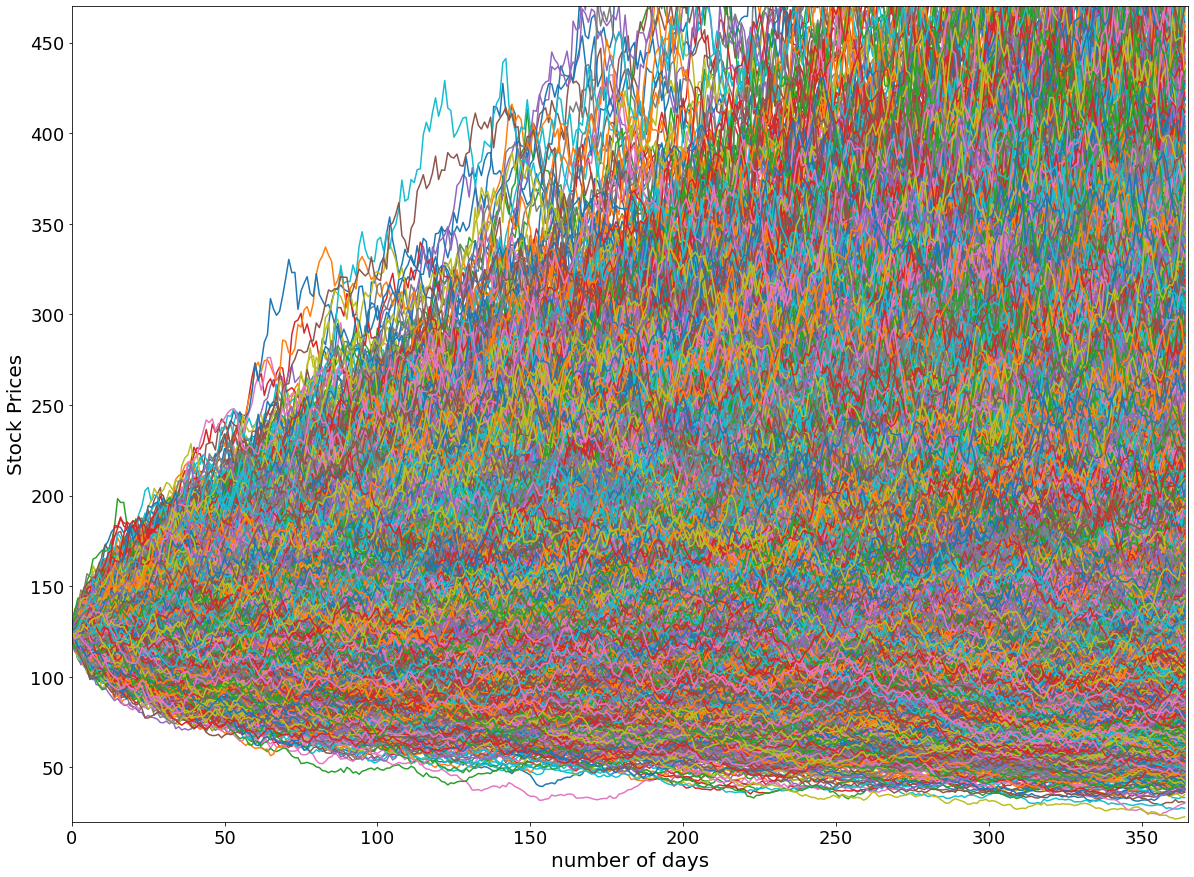

In [78]:
plt.figure(figsize = (20,15))
plt.plot(price_list)
plt.ylabel('Stock Prices', fontsize = 20)
plt.xlabel('number of days', fontsize = 20)
plt.axis([0,365, 20, 470])
plt.show()

In [57]:
#average predicted stock price for year end
sim_price = price_list[364].mean()
sim_price

178.12193395025474

In [58]:
#according to simulation we make this yearly return:
year_return = round((sim_price / current_price - 1), 4)
year_return

LOGO.IS    0.4296
Name: 2020-12-30 00:00:00, dtype: float64

In [59]:
max_price = price_list[:, 0:9999].max()
min_price = price_list[:, 0:9999].min()

In [60]:
max_price

926.8981704935131

In [61]:
min_price

21.48802697957733

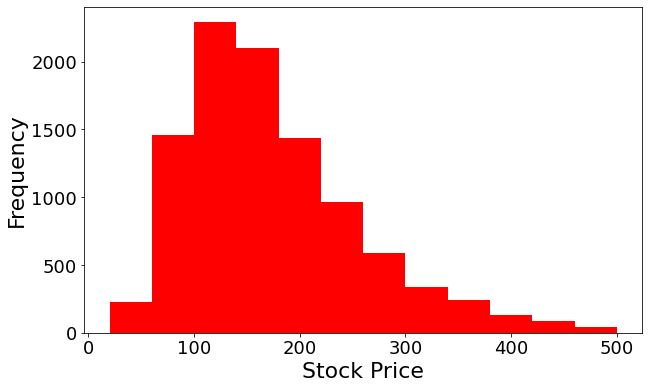

In [62]:
plt.figure(figsize = (10,6))
plt.hist(price_list[364], bins = [20,60,100,140,180,220,260,300,340,380,420,460,500], color = 'red')
plt.ylabel('Frequency', fontsize = 22)
plt.xlabel('Stock Price', fontsize = 22)
plt.rc('xtick', labelsize = 18) 
plt.rc('ytick', labelsize = 18)
plt.show()

In [63]:
xlsx_export = pd.DataFrame(price_list[364])

In [64]:
xlsx_export.to_excel("C:/Users/nicat/Desktop/Python/montecarlo_logo.xlsx")

In [65]:
np.percentile(price_list[364], 31)

124.54874197760483

In [66]:
buy_price = 125 * 1.1
buy_price

137.5

In [73]:
#Price should be above the buy_price for BUY 
np.percentile(price_list[364], 38.26)

137.44559404865737

In [68]:
#Price should be between the current_price and buy_price for HOLD
np.percentile(price_list[364], 31.2)

124.99185867183456

In [69]:
# ~62% for BUY
# ~7% for HOLD
# ~31% for SELL

In [70]:
## above result indicates that according to our simulation 67% of the rusult in one year will be higher the current one.